In [1]:
import matplotlib.colors as mcolors
import matplotlib.animation as ma
import matplotlib.pyplot as plt
from multiprocessing import Pool
from tqdm.notebook import tqdm
from itertools import product
import pandas as pd
import numpy as np
import numba as nb
import imageio
import sys
import os
import shutil

randomSeed = 100

%matplotlib inline
%config InlineBackend.figure_format = "retina"

new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.hsv(np.linspace(0, 1, 256)) * 0.85, N=256
)

@nb.njit
def colors_idx(phaseTheta):
    return np.floor(256 - phaseTheta / (2 * np.pi) * 256).astype(np.int32)

import seaborn as sns
import matplotlib.font_manager as fm

sns.set_theme(font_scale=1.1, rc={
    'figure.figsize': (6, 5),
    'axes.facecolor': 'white',
    'figure.facecolor': 'white',
    'grid.color': '#dddddd',
    'grid.linewidth': 0.5,
    "lines.linewidth": 1.5,
    'text.color': '#000000',
    'figure.titleweight': "bold",
    'xtick.color': '#000000',
    'ytick.color': '#000000'
})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = "cm"

from main import *


In [ ]:
model = ShortRangePhaseInter(K=1, J=0.5, d0=0.2, agentsNum=500, tqdm=True, randomSeed=100, dt=0.1)
model.update()
model.update_temp()

In [4]:
%%timeit
model.update()

62 ms ± 989 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%%timeit
model.update()

110 ms ± 1.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Text(0.5, 1.0, '$J=0.50,\\ K=1.00,\\ d_0=0.2$')

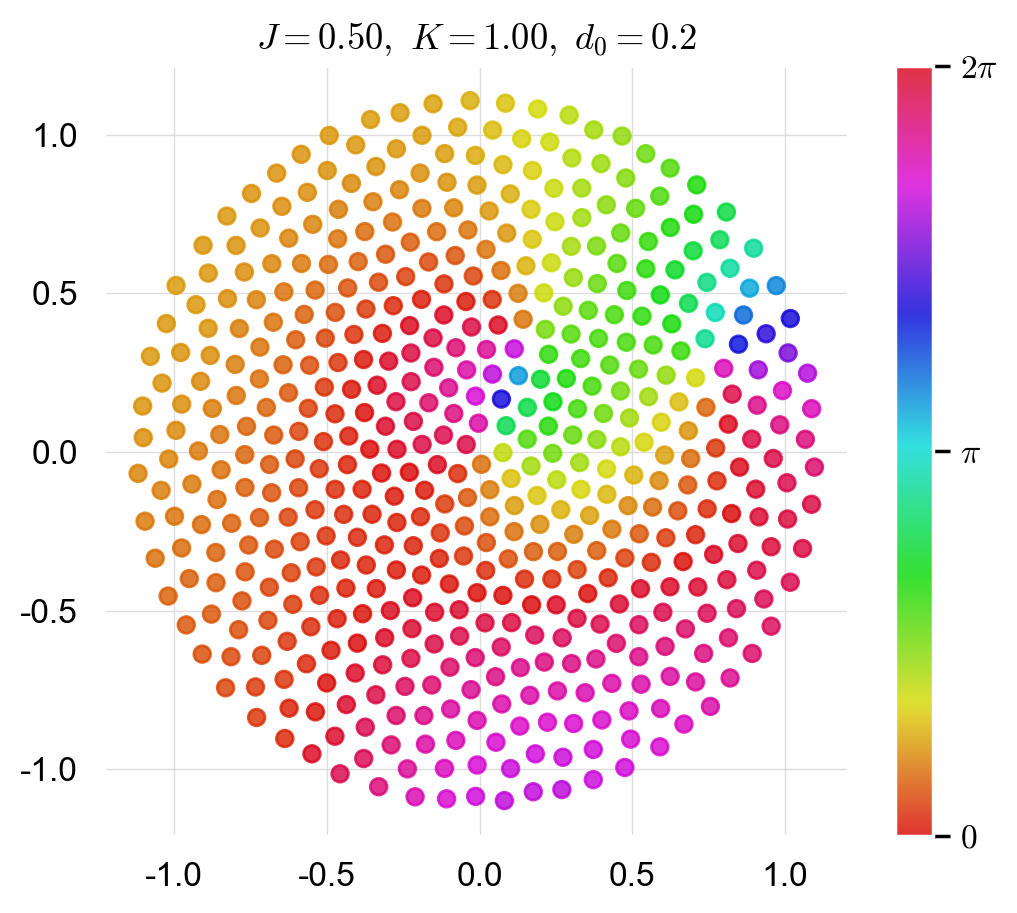

In [27]:
self = model
new_cmap = mcolors.LinearSegmentedColormap.from_list(
    "new", plt.cm.hsv(np.linspace(0, 1, 256)) * 0.85, N=256
)

fig, ax = plt.subplots(figsize=(6, 5))

sc = ax.scatter(self.positionX[:, 0], self.positionX[:, 1],
            c=self.phaseTheta, cmap=new_cmap, alpha=0.8, vmin=0, vmax=2*np.pi)

cbar = plt.colorbar(sc, ticks=[0, np.pi, 2*np.pi], ax=ax)
cbar.ax.set_ylim(0, 2*np.pi)
cbar.ax.set_yticklabels(['$0$', '$\pi$', '$2\pi$'])
ax.set_title(rf"$J={self.J:.2f},\ K={self.K:.2f},\ d_0={self.d0}$")

In [11]:
# 迭代模型, 并在data文件夹下以.h5文件保存数据, 以便后续分析
model.run(300)

  0%|          | 0/300 [00:00<?, ?it/s]

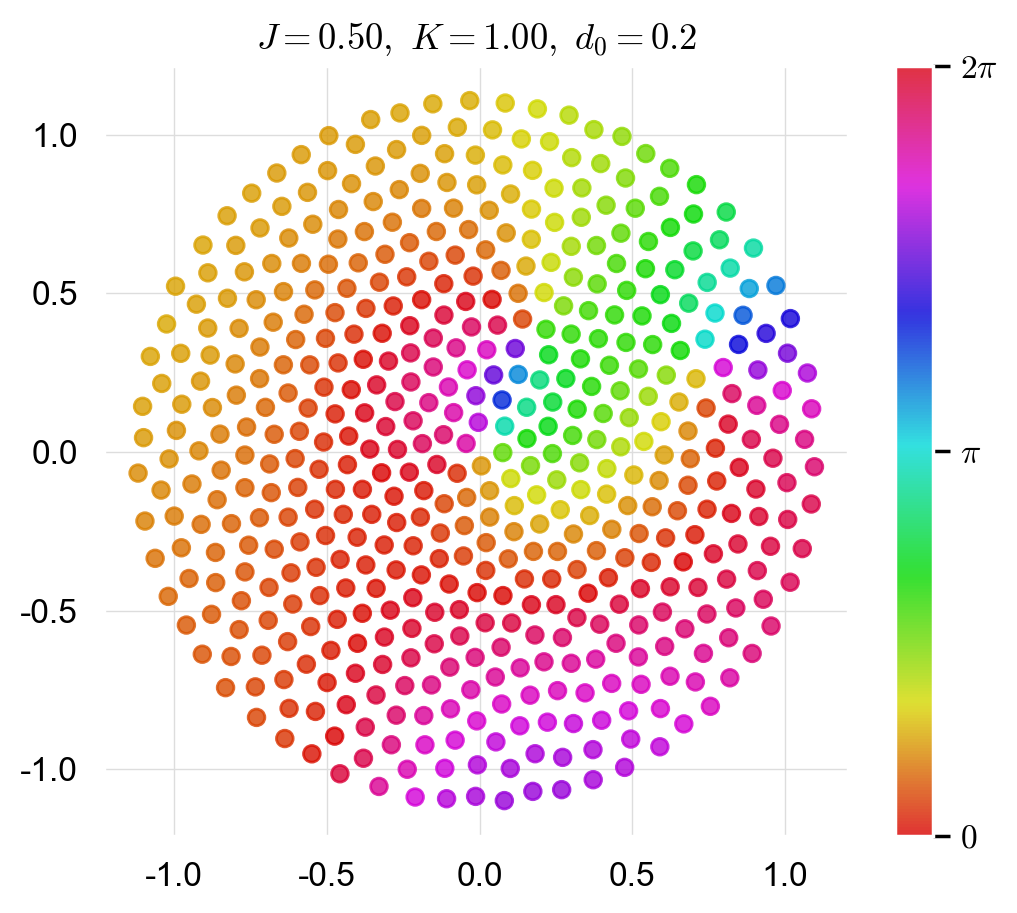

In [12]:
# 绘制模型当前状态的快照图
model.plot()

In [5]:
# 生成mp4, 保存在mp4文件夹内, 文件名为模型名
# 注意这里的模型实例必须是已经执行过计算的(即在data文件夹中有模型的.h5数据文件)
draw_mp4(model)

  0%|          | 0/601 [00:00<?, ?it/s]